In [1]:
from pathlib import Path
from math import ceil
from textwrap import wrap
from io import BytesIO
from typing import Union, IO, Iterator, Callable, Tuple, List, Any, Optional, Iterable
import re
import gzip
import logging
from collections import OrderedDict
from nptyping import NDArray
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.table import Table
from astropy.units import Quantity
import hpmoc as hpm
from hpmoc.healpy import healpy as hp
from hpmoc import PartialUniqSkymap
from hpmoc import utils as ut
from hpmoc.fits import (
    next_header,
    next_hdu,
    bintable_dtype,
    _next_header_blocks,
    read_bintable_chunks,
    extract_probdensity,
    calculate_max_rows_read,
    HEADER_NON_META,
    load_ligo,
)

LOGGER = logging.getLogger(__name__)
DATA = Path(".").absolute().parent/"tests"/"data"
FITS_BLOCKSIZE = 2880
FITS_HEADER_WIDTH = 80
FITS_HEADER_KEY_LENGTH = 8
FITS_HEADER_LENGTH = FITS_BLOCKSIZE // FITS_HEADER_WIDTH
BINTABLE_TO_NUMPY_TYPES = {
    'L': '?',    # boolean
    # 'X': bit, not supported for now.
    'B': 'B',    # unsigned byte
    'I': '>i2',  # 16-bit big-endian int
    'J': '>i4',  # 32-bit big-endian int
    'K': '>i8',  # 64-bit big-endian int
    'A': 'b',    # char/signed byte
    'E': '>f4',  # 32-bit big-endian floating point
    'D': '>f8',  # 64-bit big-endian floating point
    'C': '>c8',  # 64-bit big-endian complex floating point
    'M': '>c16', # 128-bit big-endian complex floating point
    # 'P': 32-bit array descriptor, not supported for now
    # 'Q': 64-bit array descriptor, not supported for now
}
TFORM = re.compile(r'([0-9]*)([LXBIJKAEDCMPQ])(.*)')
BUFFER_ROWS = 4**8
HEADER_NON_META = re.compile(
    "|".join(
        (
            'XTENSION',
            'BITPIX',
            'NAXIS[0-9]*',
            'PCOUNT',
            'GCOUNT',
            'TFIELDS',
            'TTYPE[0-9]*',
            'TFORM[0-9]*',
            'TUNIT[0-9]*',
            'EXTNAME',
        )
    )
)

NUNIQ_FITS = DATA/'S200105ae.fits'
NUNIQ_FITS_GZ = DATA/'S200105ae.fits.gz'
BAYESTAR_NEST_FITS_GZ_1024 = DATA/'S200316bj-1-Preliminary.fits.gz'
CWB_NEST_FITS_GZ_128 = DATA/'S200114f-3-Initial.fits.gz'
CWB_RING_FITS_GZ_128 = DATA/'S200129m-3-Initial.fits.gz'

In [ ]:
PartialUniqSkymap.read(NUNIQ_FITS_GZ, strategy='ligo')

UNIQ,PROBDENSITY
,1 / sr
int64,float64
4,0.0
6,0.0
7,0.0
8,0.0
11,0.0
14,0.0
15,0.0
21,0.0

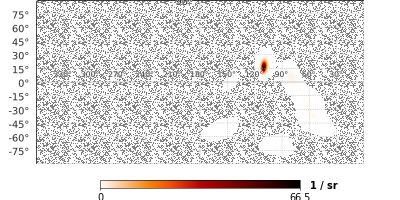

In [3]:
mot

In [3]:
with gzip.open(CWB_NEST_FITS_GZ_128, 'rb') as f:
    [[u, s, meta]] = load_ligo(f)
    mo = PartialUniqSkymap(s, u, meta=meta, name='PROBDENSITY')

UNIQ,PROBDENSITY
,1 / sr
int64,float64
4,0.0
6,0.0
7,0.0
8,0.0
11,0.0
14,0.0
15,0.0
21,0.0

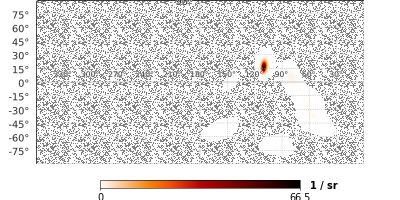

In [4]:
mo

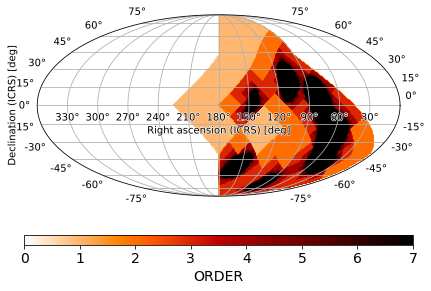

In [6]:
ax = mo.o⃗(as_skymap=True).plot(cbar=True)#projection='CAR', cmap='rainbow', cbar={'orientation': 'horizontal', 'aspect': 40})

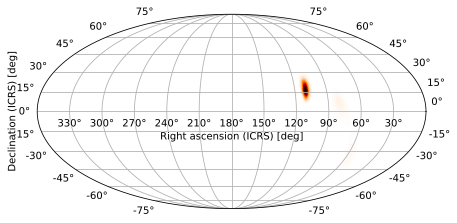

In [8]:
mo.plot()

In [8]:
moo = PartialUniqSkymap.read(CWB_NEST_FITS_GZ_128, strategy='ligo')

In [15]:
moo.to_table().meta

OrderedDict([('CONFIGUR', '2G:MRA:Packet(+10) un-modeled'),
             ('PIXTYPE', 'HEALPIX'),
             ('ORDERING', 'NUNIQ'),
             ('COORDSYS', 'C'),
             ('NSIDE', 128),
             ('INDXSCHM', 'IMPLICIT'),
             ('DATE-OBS', '2020-01-14T02:08:18.230000'),
             ('MJD-OBS', 58862.08909988435),
             ('DATE', '2020-01-14T02:11:51.000000'),
             ('CREATOR', 'CWB'),
             ('MOC', True),
             ('PARTIAL', True),
             ('HISTORY',
              ['',
               ' Pixels were downselected by the LLAMA pipeline to overlap with the',
               'sky regions specified in NUNIQ mask indices:  [ 4  5  6  7  8  9 10 11',
               '12 13 14 15].  This is a PARTIAL skymap; not all pixels are included.',
               'You can read this file with astropy.table.Table.read(); the included',
               'indices in NUNIQ ordering can be found in the UNIQ column, and their',
               'corresponding pixel pr

In [20]:
from astropy.table import meta

In [11]:
mo.meta

OrderedDict([('PIXTYPE', 'HEALPIX'), ('ORDERING', 'NUNIQ'), ('PARTIAL', True)])

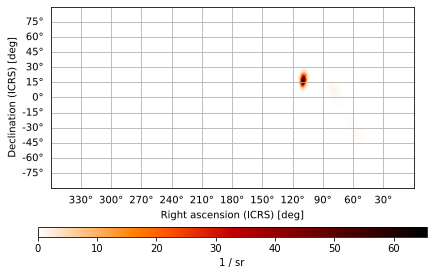

In [5]:
mo.plot(projection='CAR', cbar=True)

In [18]:
str(mo.s⃗.unit)

'1 / sr'

In [8]:
hp.nside2npix(hp.order2nside(7))

196608

UNIQ,PIXELS
,1 / sr
int64,float64
4,0.0
6,0.0
7,0.0
8,0.0
11,0.0
14,0.0
15,0.0
21,0.0

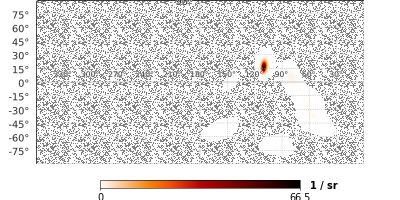

In [6]:
mo

In [7]:
with gzip.open(CWB_NEST_FITS_GZ_128, 'rb') as f:
    # read first hdu
    hdu0 = next_hdu(f)
    for table in read_bintable_chunks(f):#, tables=1):
        for u, [s] in table:
            print(u)
            print(len(u))
            print(s)
            print(len(s))

[ 65536  65537  65538 ... 131069 131070 131071]
65536
[0. 0. 0. ... 0. 0. 0.] 1 / sr
65536
[131072 131073 131074 ... 196605 196606 196607]
65536
[0. 0. 0. ... 0. 0. 0.] 1 / sr
65536
[196608 196609 196610 ... 262141 262142 262143]
65536
[0. 0. 0. ... 0. 0. 0.] 1 / sr
65536


In [16]:
with gzip.open(CWB_RING_FITS_GZ_128, 'rb') as f:
    hd0 = next_hdu(f)
    hd1 = next_hdu(f)

In [30]:
with open(NUNIQ_FITS, 'rb') as f:
    hdu0 = next_hdu(f)
    hdu1 = next_hdu(f)

In [32]:
hdu1.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   40 / length of dimension 1                          
NAXIS2  =                19200 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    5 / number of table fields                         
TTYPE1  = 'UNIQ    '                                                            
TFORM1  = 'K       '                                                            
TTYPE2  = 'PROBDENSITY'                                                         
TFORM2  = 'D       '                                                            
TUNIT2  = 'sr-1    '        

In [26]:
Table.read(NUNIQ_FITS).meta

OrderedDict([('MOC', True),
             ('PIXTYPE', 'HEALPIX'),
             ('ORDERING', 'NUNIQ'),
             ('COORDSYS', 'C'),
             ('MOCORDER', 8),
             ('INDXSCHM', 'EXPLICIT'),
             ('OBJECT', 'G359417'),
             ('REFERENC', 'https://gracedb.ligo.org/events/G359417'),
             ('INSTRUME', 'L1,V1'),
             ('DATE-OBS', '2020-01-05T16:24:26.056489'),
             ('MJD-OBS', 58853.68363491308),
             ('DATE', '2020-01-05T16:25:11.000000'),
             ('CREATOR', 'BAYESTAR'),
             ('ORIGIN', 'LIGO/Virgo'),
             ('RUNTIME', 2.426242537796497),
             ('DISTMEAN', 265.0966291797101),
             ('DISTSTD', 71.12767220341831),
             ('LOGBCI', 1.324475701163824),
             ('LOGBSN', 46.76481188227142),
             ('VCSVERS', 'ligo.skymap 0.1.14'),
             ('VCSREV', '6700e6a991e99afbbebe3632d2f3bfe8aedd06a4'),
             ('DATE-BLD', '2019-11-16T21:23:11'),
             ('HISTORY',
        

In [17]:
hd1.header.cards

('XTENSION', 'BINTABLE', 'binary table extension')
('BITPIX', 8, '8-bit bytes')
('NAXIS', 2, '2-dimensional binary table')
('NAXIS1', 4096, 'width of table in bytes')
('NAXIS2', 192, 'number of rows in table')
('PCOUNT', 0, 'size of special data area')
('GCOUNT', 1, 'one data group (required keyword)')
('TFIELDS', 1, 'number of fields in each row')
('TTYPE1', 'PROB', 'label for field   1')
('TFORM1', '1024E', 'data format of field: 4-byte REAL')
('TUNIT1', 'pix-1', 'physical unit of field')
('EXTNAME', 'xtension', 'name of this binary table extension')
('PIXTYPE', 'HEALPIX', 'HEALPIX pixelisation')
('ORDERING', 'RING', 'Pixel ordering scheme, either RING or NESTED')
('NSIDE', 128, 'Resolution parameter for HEALPIX')
('FIRSTPIX', 0, 'First pixel # (0 based)')
('LASTPIX', 196607, 'Last pixel # (0 based)')
('INDXSCHM', 'IMPLICIT', 'Indexing: IMPLICIT or EXPLICIT')
('COORDSYS', 'C', 'Pixelisation coordinate system')
('CREATOR', 'CWB', 'Program that created this file')
('CONFIGUR', '2G:MRA:

In [33]:
moo.meta

OrderedDict([('CONFIGUR', '2G:MRA:Packet(+10) un-modeled'),
             ('PIXTYPE', 'HEALPIX'),
             ('ORDERING', 'NUNIQ'),
             ('COORDSYS', 'C'),
             ('NSIDE', 128),
             ('INDXSCHM', 'IMPLICIT'),
             ('DATE-OBS', '2020-01-14T02:08:18.230000'),
             ('MJD-OBS', 58862.08909988435),
             ('DATE', '2020-01-14T02:11:51.000000'),
             ('CREATOR', 'CWB'),
             ('MOC', True),
             ('PARTIAL', True),
             ('HISTORY',
              ['',
               ' Pixels were downselected by the LLAMA pipeline to overlap with the',
               'sky regions specified in NUNIQ mask indices:  [ 4  5  6  7  8  9 10 11',
               '12 13 14 15].  This is a PARTIAL skymap; not all pixels are included.',
               'You can read this file with astropy.table.Table.read(); the included',
               'indices in NUNIQ ordering can be found in the UNIQ column, and their',
               'corresponding pixel pr

In [41]:
with open(NUNIQ_FITS, 'rb') as f:
    hs0 = _next_header_blocks(f)
    hs1 = _next_header_blocks(f)
    hd0, = fits.HDUList.fromstring(hs0)
    hd1, = fits.HDUList.fromstring(hs1)
    dtype = np.dtype([(c.name, BINTABLE_TO_NUMPY_TYPES[c.format]) for c in hd1.columns])
    #tab = np.frombuffer(f.read(hd1.header['NAXIS1']*10), dtype=dtype)
    tab = np.frombuffer(f.read(hd1.header['NAXIS1']*10), dtype=[('UNIQ', '>i8'), ('REST', '(4,)>f8')])
    #h1 = fits.Header.fromstring(hs1)
    #h1['NAXIS2'] = 100
    #hd1_0, = fits.HDUList.fromstring(h1.tostring().encode())
    #buf = BytesIO(f.read(hd1_0.size))
    #buf.seek(0)
    #tab = hd1_0.readfrom(buf)

In [42]:
hd1.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   40 / length of dimension 1                          
NAXIS2  =                19200 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    5 / number of table fields                         
TTYPE1  = 'UNIQ    '                                                            
TFORM1  = 'K       '                                                            
TTYPE2  = 'PROBDENSITY'                                                         
TFORM2  = 'D       '                                                            
TUNIT2  = 'sr-1    '        

In [102]:
tab

array([(1024, 0.00924442, 166.04100755,  77.64237103, 2.97840680e-05),
       (1025, 0.01020881, 143.73043837,  83.13282123, 3.63855617e-05),
       (1026, 0.0026877 , 132.46073881,  84.66111686, 4.06920609e-05),
       (1027, 0.00301602,  69.71120026,  99.29488834, 7.50446909e-05),
       (1028, 0.01326684, 134.5433377 ,  82.92336069, 4.02186414e-05),
       (1029, 0.0205938 , 144.78794411,  76.27714446, 3.74018580e-05),
       (1030, 0.00434119,  35.15745476, 103.1343964 , 1.12547108e-04),
       (1031, 0.0067673 ,  53.30797332,  94.44251615, 9.89361732e-05),
       (1032, 0.00083561,  97.43396584,  91.10788204, 5.79422459e-05),
       (1033, 0.00090659, -65.27190554, 123.42406103, 3.30732314e-04)],
      dtype=[('UNIQ', '>i8'), ('PROBDENSITY', '>f8'), ('DISTMU', '>f8'), ('DISTSIGMA', '>f8'), ('DISTNORM', '>f8')])

In [71]:
BytesIO(f.read

In [67]:
hd1_0.readfrom?

In [50]:
hd1.readfrom?

In [27]:
isinstance(hd1, fits.BinTableHDU)

True

In [33]:
h1 = fits.Header.fromstring(hs1)

In [36]:
h1['NAXIS2'] = 100

In [88]:
[(c.name, BINTABLE_TO_NUMPY_TYPES[c.format]) for c in hd1.columns]

dtype([('UNIQ', '>i8'), ('PROBDENSITY', '>f8'), ('DISTMU', '>f8'), ('DISTSIGMA', '>f8'), ('DISTNORM', '>f8')])

In [80]:
np.dtype([('x', '>i2')])

dtype([('x', '>i2')])

In [73]:
fits.Header.fromstring(hs1)

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   40 / length of dimension 1                          
NAXIS2  =                19200 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    5 / number of table fields                         
TTYPE1  = 'UNIQ    '                                                            
TFORM1  = 'K       '                                                            
TTYPE2  = 'PROBDENSITY'                                                         
TFORM2  = 'D       '                                                            
TUNIT2  = 'sr-1    '        

In [5]:
pwd

'/Users/s/dev/hpmoc/jup'

In [ ]:
with open(NUNIQ_FITS, 'rb') as f:
    f.read(FITS_BLOCKSIZE)
    

In [ ]:
def load(infile: Union[IO, str], 